In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
path='D://Digesh Personal//Simplilearn//Data-Science-Capstone-Projects//Walmart Project//'
df = pd.read_csv(path+"train.csv", names=['Store','Dept','Date','weeklySales','isHoliday'],sep=',', header=0)
features = pd.read_csv(path+"features.csv",sep=',', header=0,
                       names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4',
                              'MarkDown5','CPI','Unemployment','IsHoliday']).drop(columns=['IsHoliday'])
stores = pd.read_csv(path+"stores.csv", names=['Store','Type','Size'],sep=',', header=0)
df = df.merge(stores, how='left').merge(features, how='left')
column_date = df['Date']
df.shape

(421570, 16)

In [3]:
df.head()

,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [4]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['weeklySales'])
    plt.ylabel('weeklySales')
    plt.xlabel(column)

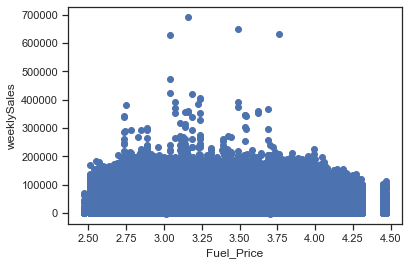

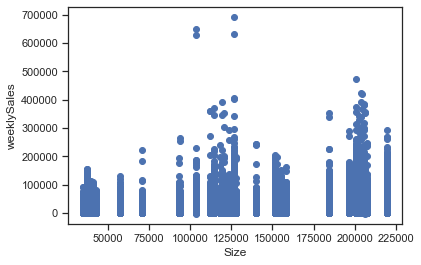

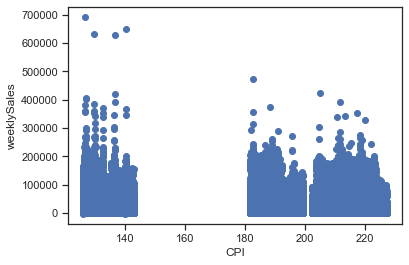

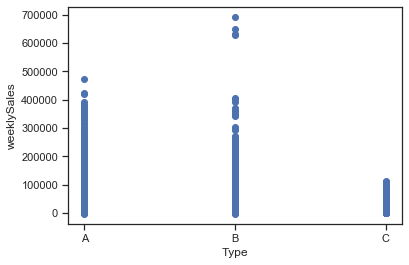

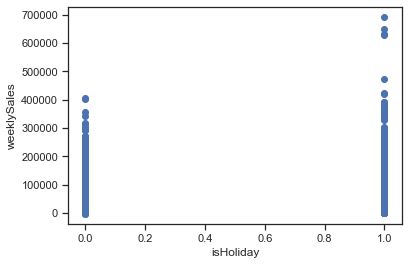

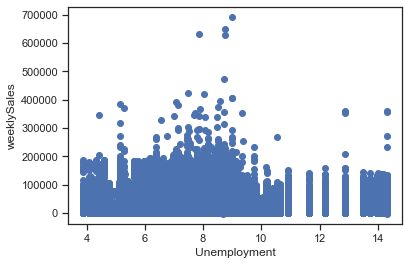

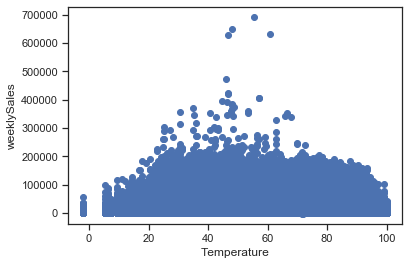

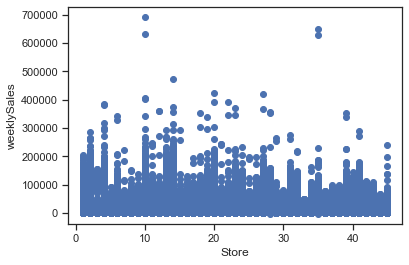

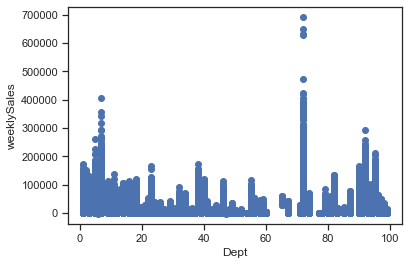

In [5]:
scatter(df, 'Fuel_Price')
scatter(df, 'Size')
scatter(df, 'CPI')
scatter(df, 'Type')
scatter(df, 'isHoliday')
scatter(df, 'Unemployment')
scatter(df, 'Temperature')
scatter(df, 'Store')
scatter(df, 'Dept')

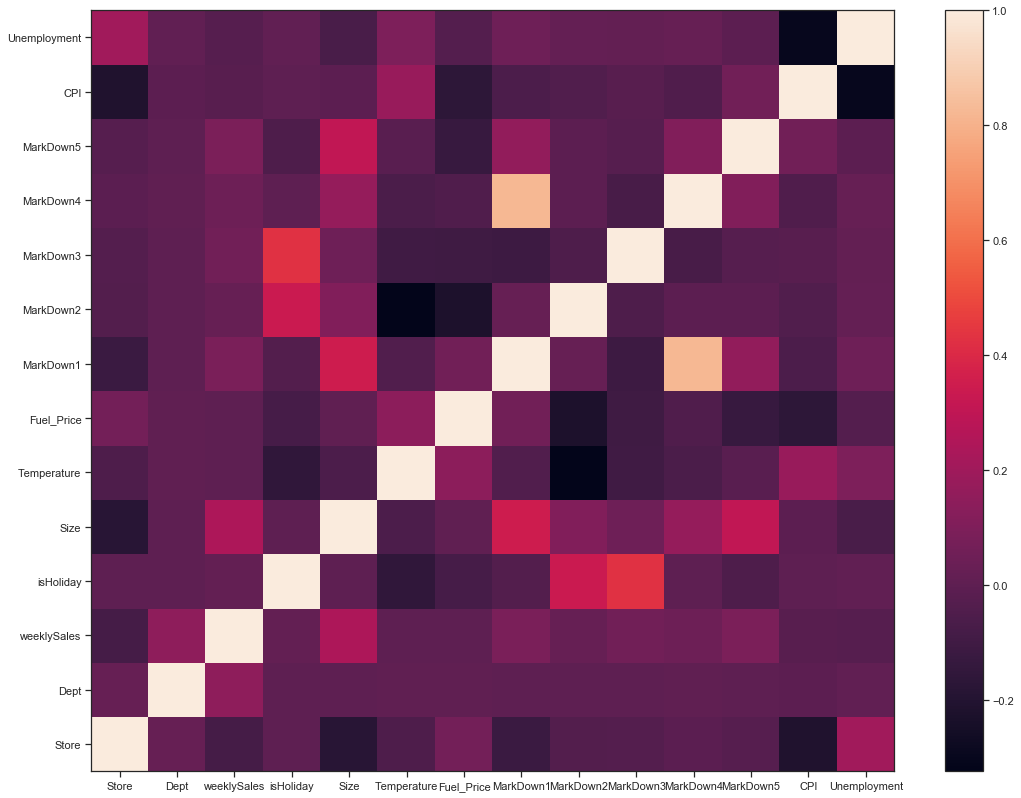

In [6]:
fig = plt.figure(figsize=(18, 14))
corr = df.corr()
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

In [7]:
#sns.pairplot(df, vars=['weeklySales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [8]:
#sns.pairplot(df.fillna(0), vars=['weeklySales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

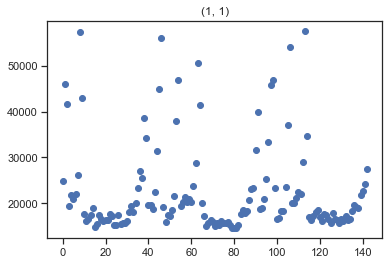

In [9]:
for name, group in df.groupby(["Store", "Dept"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["weeklySales"])
    plt.show()
    break

# Data manipulation

In [10]:
import datetime as dt
df = pd.get_dummies(df, columns=["Type"])
df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
df['Month'] = pd.to_datetime(df['Date']).dt.month
df = df.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
df.shape

(421570, 14)

# Algorithms

In [11]:
def knn():
    knn = KNeighborsRegressor(n_neighbors=10)
    return knn

def extraTreesRegressor():
    clf = ExtraTreesRegressor(n_estimators=100,max_features='auto', verbose=1, n_jobs=1)
    return clf

def randomForestRegressor():
    clf = RandomForestRegressor(n_estimators=100,max_features='log2', verbose=1)
    return clf

def svm():
    clf = SVR(kernel='rbf', gamma='auto')
    return clf

def nn():
    clf = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', verbose=3)
    return clf

def predict_(m, test_x):
    return pd.Series(m.predict(test_x))

def model_():
#     return knn()
    return extraTreesRegressor()
#     return svm()
#     return nn()
#     return randomForestRegressor()    

def train_(train_x, train_y):
    m = model_()
    m.fit(train_x, train_y)
    return m

def train_and_predict(train_x, train_y, test_x):
    m = train_(train_x, train_y)
    return predict_(m, test_x), m
#

In [12]:
def calculate_error(test_y, predicted, weights):
    return mean_absolute_error(test_y, predicted, sample_weight=weights)

# K-Fold Cross Validation

In [13]:
kf = KFold(n_splits=2)
splited = []
# dataset2 = dataset.copy()
for name, group in df.groupby(["Store", "Dept"]):
    group = group.reset_index(drop=True)
    trains_x = []
    trains_y = []
    tests_x = []
    tests_y = []
    if group.shape[0] <= 2:
        f = np.array(range(2))
        np.random.shuffle(f)
        group['fold'] = f[:group.shape[0]]
        continue
    fold = 0
    for train_index, test_index in kf.split(group):
        group.loc[test_index, 'fold'] = fold
        fold += 1
    splited.append(group)

splited = pd.concat(splited).reset_index(drop=True)

In [14]:
splited.head()

,Store,Dept,weeklySales,isHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month,fold
0,1,1,24924.50,False,151315,42.31,0.0,0.0,0.0,0.0,1,0,0,2,0.0
1,1,1,46039.49,True,151315,38.51,0.0,0.0,0.0,0.0,1,0,0,2,0.0
2,1,1,41595.55,False,151315,39.93,0.0,0.0,0.0,0.0,1,0,0,2,0.0
3,1,1,19403.54,False,151315,46.63,0.0,0.0,0.0,0.0,1,0,0,2,0.0
4,1,1,21827.90,False,151315,46.50,0.0,0.0,0.0,0.0,1,0,0,3,0.0


In [15]:
best_model = None
error_cv = 0
best_error = np.iinfo(np.int32).max
for fold in range(2):
    dataset_train = splited.loc[splited['fold'] != fold]
    dataset_test = splited.loc[splited['fold'] == fold]
    train_y = dataset_train['weeklySales']
    train_x = dataset_train.drop(columns=['weeklySales', 'fold'])
    test_y = dataset_test['weeklySales']
    test_x = dataset_test.drop(columns=['weeklySales', 'fold'])
    print(dataset_train.shape, dataset_test.shape)
    predicted, model = train_and_predict(train_x, train_y, test_x)
    weights = test_x['isHoliday'].replace(True, 2).replace(False, 1)
    error = calculate_error(test_y, predicted, weights)
    error_cv += error
    print(fold, error)
    if error < best_error:
        print('Find best model')
        best_error = error
        best_model = model
error_cv /= 2

(209252, 15) (212221, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished


0 3601.703953402913
Find best model
(212221, 15) (209252, 15)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.9s finished


1 2564.5974406917603
Find best model


In [16]:
dataset_test.head()

,Store,Dept,weeklySales,isHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month,fold
72,1,1,15682.81,False,151315,83.58,0.0,0.0,0.0,0.0,1,0,0,6,1.0
73,1,1,15363.50,False,151315,85.55,0.0,0.0,0.0,0.0,1,0,0,7,1.0
74,1,1,16148.87,False,151315,85.83,0.0,0.0,0.0,0.0,1,0,0,7,1.0
75,1,1,15654.85,False,151315,88.54,0.0,0.0,0.0,0.0,1,0,0,7,1.0
76,1,1,15766.60,False,151315,85.77,0.0,0.0,0.0,0.0,1,0,0,7,1.0


In [17]:
dataset_test = dataset_test.drop(['isHoliday','fold'], axis=1)

In [18]:
predicted_test = best_model.predict(dataset_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.8s finished


In [19]:
dataset_test['weeklySales'] = predicted_test
dataset_test['Date'] = column_date
dataset_test['Store'] = dataset_test['Store'].astype(str)
dataset_test['Dept'] = dataset_test['Dept'].astype(str)
dataset_test['Date'] = dataset_test['Date'].astype(str)
dataset_test = dataset_test[['Store', 'Dept', 'Date', 'weeklySales']]
#dataset_test = dataset_test.rename(columns={'id': 'Id', 'weeklySales': 'Weekly_Sales'})

In [20]:
dataset_test.to_csv(path+'output.csv', index=False)